In [17]:
import numpy as np
import matplotlib.pyplot as plt

from data import dataset

In [18]:
data = dataset()
(x, y) = data('train')
(xt, yt) = data('test')

In [19]:
print(x.shape, y.shape)
print(xt.shape, yt.shape)

(60000, 28, 28, 1) (60000, 10)
(10000, 28, 28, 1) (10000, 10)


In [20]:
y_ext = np.concatenate((y, np.zeros((60000, 1))), axis=1)
yt_ext = np.concatenate((yt, np.zeros((10000, 1))), axis=1)

In [21]:
# invert training examples
#x_inv = 1 - x / np.max(x)

#res = np.concatenate((x, x_inv), axis=0)
#res_y = np.concatenate((y, y), axis=0)
#print(res.shape, res_y.shape)

In [22]:
from PIL import ImageOps, ImageFilter
from PIL import Image, ImageDraw, ImageFont

fonts = ["arial.ttf", "times.ttf", "verdana.ttf", "corbel.ttf", "impact.ttf"]
symbols = ["'", '~', '\"', ';', '#', 'Ä', '*', '+', '-', '_', ':', '..', ',', '\\', '{', '}', 'ß', '?', '!', '$', 
          '%', '&', '/', '[', ']', '(', ')', '=', '<', '>', '|', '@', '€', 'ö', 'Ö', 'ä', 'ü', 'Ü', 'q', 'w', 'e',
          '^', '°', 'r', 't', 'z', 'u', 'i', 'o', 'p', 'a', 's', 'd', 'f', 'g', 'h', 'j', 'k', 'l', 'y', 'x', 'c', 
          'v', 'b', 'n', 'm', 'M', 'N', 'B', 'V', 'C', 'X', 'Y', 'L', 'K', 'J', 'H', 'G', 'F', 'D', 'S', 'A', 'P',
          'O', 'I', 'U', 'Z', 'T', 'R', 'E', 'W', 'Q']

def generate_digit(symbol, font="arial.ttf", font_size=24, intensity=255):
    im = Image.new("L", (28,28))
    fnt = ImageFont.truetype(font, font_size)
    dc = ImageDraw.Draw(im)
    dc.text((8,0), symbol, font=fnt, fill=intensity)
    return np.asarray(im)


#plt.imshow(generate_digit('..', "times.ttf"))



In [23]:
from matplotlib import font_manager

In [24]:
system_fonts = font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

In [25]:
#xx = generate_digit(symbols[0], system_fonts[0]).reshape((1,28,28,1))
#print(xx.shape)

res = x
for font in system_fonts[0:66]:
    print('font: ' + font)
    for symbol in symbols:
        spl = generate_digit(symbol, font).reshape((1,28,28,1))
        res = np.concatenate((res, spl), axis=0)
        #res = np.concatenate((res, 1 - spl / np.max(spl)), axis=0)
        
    
print(res.shape)

font: C:\Windows\Fonts\consolai.ttf
font: C:\Windows\Fonts\georgiaz.ttf
font: C:\Windows\Fonts\corbel.ttf
font: C:\Windows\Fonts\CALIFR.TTF
font: C:\Windows\Fonts\GIL_____.TTF
font: C:\Windows\Fonts\AGENCYR.TTF
font: C:\Windows\Fonts\ROCC____.TTF
font: C:\Windows\Fonts\msgothic.ttc
font: C:\Windows\Fonts\micross.ttf
font: C:\Windows\Fonts\ENGR.TTF
font: C:\Windows\Fonts\couri.ttf
font: C:\Windows\Fonts\LEELAWDB.TTF
font: C:\Windows\Fonts\FRSCRIPT.TTF
font: C:\Windows\Fonts\segoescb.ttf
font: C:\Windows\Fonts\palab.ttf
font: C:\Windows\Fonts\sylfaen.ttf
font: C:\Windows\Fonts\ERASBD.TTF
font: C:\Windows\Fonts\trebucbd.ttf
font: C:\Windows\Fonts\LTYPE.TTF
font: C:\Windows\Fonts\ntailu.ttf
font: C:\Windows\Fonts\YuGothR.ttc
font: C:\Windows\Fonts\constanz.ttf
font: C:\Windows\Fonts\CALIFB.TTF
font: C:\Windows\Fonts\calibriz.ttf
font: C:\Windows\Fonts\calibril.ttf
font: C:\Windows\Fonts\GOUDOSB.TTF
font: C:\Windows\Fonts\ONYX.TTF
font: C:\Windows\Fonts\Nirmala.ttf
font: C:\Windows\Fonts\LS

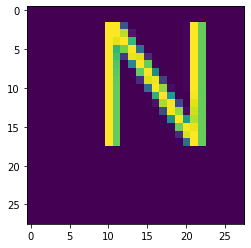

In [32]:
plt.imshow(res[60251,:,:,0])

In [34]:
lbls = np.concatenate((np.zeros((6072, 10)), np.ones((6072, 1))), axis=1)


y_ext = np.concatenate((y_ext, lbls), axis=0)
print(y_ext.shape)

(66072, 11)


In [35]:
#with open('ds.npy', 'wb') as f:
#    np.save(f, res)
#    np.save(f, y_ext)

In [36]:
with open('ds.npy', 'rb') as f:
    ds_x = np.load(f)
    ds_y = np.load(f)

In [42]:
index = np.arange(66072)
np.random.shuffle(index)

In [43]:
xf = ds_x[index]
yf = ds_y[index]

In [44]:
#with open('ds-ext.npy', 'wb') as f:
#    np.save(f, xf)
#    np.save(f, yf)